# Buy On Gap Strategy

Strategy: 
1. Select stocks near the market open whose returns from their previous day's lows to today's opens are lower than one standard deviation. The standard deviation is computed using the daily close-to-close return of the last 90 days. These are the stocks that 'gapped down'. 
2. Narrow down the list of stocks by requiring their open prices to be higher than the 20-day moving average of the closing prices. 
3. Buy the 10 stocks within this list that have the lowest returns from their previous day's lows. If the list has fewer than 10 stocks, buy the entire list. 
4. Liquidate all positions at the market close. 

## Imports

In [203]:
import yfinance as yf
import pandas as pd

## Gather data

We use a pool of 20 high market cap stocks. 

In [186]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'META', 'BRK-B', 'TSLA', 'LLY', 'V', 'UNH', 'TSM', 'AVGO', 'JPM', 'NVO', 'WMT', 'XOM', 'JNJ', 'MA', 'PG']
period = '10y'
interval = '1d'

Firstly we need the daily OHLC data for all the stocks

In [187]:
prices = [yf.Ticker(t).history(period=period, interval=interval) for t in tickers]

Now we extract the relevant data for all the stocks, starting with the open price. 

In [188]:
prices_open_df = pd.DataFrame({ticker: price_series['Open'][(prices[0].index[:-1])] for ticker, price_series in zip(tickers, prices)})
prices_open_df

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,17.715116,32.351818,26.644878,19.417500,3.747799,48.980000,115.970001,9.434000,40.535975,47.487505,62.849810,13.208496,36.735316,42.790484,12.130626,64.664538,61.770550,71.296822,71.251168,62.425573
2013-12-09,17.562016,32.469702,26.674767,19.405500,3.648738,48.090000,116.879997,9.133333,40.729234,47.039896,63.081565,13.344199,35.807610,42.571119,12.147543,65.094500,62.407973,71.830028,71.736369,63.363135
2013-12-10,17.645921,32.511807,26.803286,19.187000,3.587414,48.639999,117.029999,9.336667,40.954716,46.837085,63.253214,13.148181,36.020531,42.729974,12.068363,64.672663,62.375451,72.043318,71.322600,63.310653
2013-12-11,17.753004,32.048674,27.083485,19.367001,3.677041,50.549999,115.599998,9.458667,40.745363,46.858069,63.579333,13.268808,35.556672,42.767786,12.110321,64.169674,62.037227,71.906232,74.636268,62.808091
2013-12-12,17.600837,31.695001,26.888466,19.063000,3.622793,51.049999,114.489998,9.313333,40.101147,47.783572,61.957234,13.148182,35.320948,42.397145,11.940451,64.177780,61.464864,70.717929,74.425652,62.868112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,190.899994,383.760010,138.985001,147.850006,483.747471,339.690002,360.950012,249.210007,592.200012,253.919998,528.198083,99.000000,948.340027,154.169998,101.550003,158.770004,104.269997,151.330002,411.010010,152.289993
2023-11-30,189.839996,378.489990,136.399994,144.759995,480.197781,331.890015,359.450012,245.139999,591.460022,254.250000,533.968382,98.930000,941.000000,154.910004,101.489998,156.020004,103.110001,152.259995,410.100006,150.899994
2023-12-01,190.330002,376.760010,133.320007,146.000000,465.209104,325.480011,359.940002,233.139999,591.700012,255.789993,550.419983,97.699997,922.460022,155.820007,101.099998,155.380005,102.500000,156.440002,412.890015,153.330002


Then the low price.

In [189]:
prices_low_df = pd.DataFrame({ticker: price_series['Low'][(prices[0].index[:-1])] for ticker, price_series in zip(tickers, prices)})
prices_low_df

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,17.520366,31.989736,26.403034,19.191500,3.639304,47.709999,115.760002,9.086667,40.463503,46.858069,62.515086,13.193417,35.701160,42.071888,12.079191,64.607751,61.523387,71.159713,70.779133,62.380567
2013-12-09,17.562016,32.309709,26.600794,19.128500,3.580339,47.740002,116.769997,8.947333,40.656762,46.941984,63.021488,13.170799,35.396989,42.427401,12.123856,64.656426,62.180326,71.372993,71.275618,63.258124
2013-12-10,17.571401,32.014993,26.790831,19.150999,3.582697,48.540001,115.599998,9.324000,40.519883,46.492058,63.236052,13.057711,35.343768,42.624073,11.995947,64.129129,62.043734,71.571051,71.322600,62.575614
2013-12-11,17.524126,31.484495,26.778875,19.100000,3.627511,49.009998,114.279999,9.299333,40.157535,46.858069,61.708343,13.140643,35.024389,42.329063,12.000007,64.129116,61.243717,70.862676,74.234753,62.710589
2013-12-12,17.534772,31.307656,26.625202,18.975000,3.556753,50.660000,114.040001,9.235333,39.569686,47.207754,60.858672,12.884313,34.773453,42.291247,11.889015,63.601795,61.321770,69.369690,73.469357,61.450542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,188.970001,377.440002,136.294998,145.970001,478.557924,330.779999,358.299988,242.759995,584.440002,253.520004,526.852698,98.599998,939.369995,154.000000,100.860001,155.610001,101.639999,151.070007,409.420013,150.990005
2023-11-30,188.190002,375.470001,132.789993,144.330002,464.179200,322.399994,358.420013,236.910004,586.210022,253.169998,532.194466,96.900002,918.369995,154.380005,101.010002,154.509995,101.809998,151.919998,408.779999,150.080002
2023-12-01,189.229996,371.309998,132.151993,145.550003,461.829396,320.760010,355.299988,231.899994,583.000000,253.899994,545.159973,97.019997,908.000000,155.820007,100.309998,152.630005,102.220001,155.470001,411.570007,152.229996


We need the returns from the previous day's low to today's open. 

In [190]:
returns_lows_to_open_df = (prices_open_df / prices_low_df.shift(1)) - 1
returns_lows_to_open_df.dropna(inplace=True)
returns_lows_to_open_df

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-09,0.002377,0.015004,0.010292,0.011151,0.002592,0.007965,0.009675,0.005136,0.006567,0.003880,0.009061,0.011429,0.002982,0.011866,0.005659,0.007534,0.014378,0.009420,0.013524,0.015751
2013-12-10,0.004778,0.006255,0.007612,0.003058,0.001976,0.018852,0.002227,0.043514,0.007329,-0.002235,0.003677,-0.001717,0.017616,0.007132,-0.004577,0.000251,0.003138,0.009392,0.000659,0.000830
2013-12-11,0.010335,0.001052,0.010924,0.011279,0.026333,0.041409,0.000000,0.014443,0.005565,0.007873,0.005429,0.016166,0.006024,0.003372,0.009534,0.000632,-0.000105,0.004683,0.046460,0.003715
2013-12-12,0.004377,0.006686,0.004092,-0.001937,-0.001301,0.041624,0.001838,0.001505,-0.001404,0.019751,0.004033,0.000574,0.008467,0.001608,-0.004963,0.000759,0.003611,-0.002043,0.002572,0.002512
2013-12-13,0.005035,0.006455,0.005987,0.015336,0.003979,0.019739,0.002981,0.068722,0.002849,0.009926,0.004090,0.008777,0.006560,0.008228,0.003472,0.004210,0.009016,0.004282,0.005337,0.004760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,0.007920,0.014809,0.014193,0.015942,0.019085,0.018866,0.004844,0.064955,0.004819,0.009181,-0.018646,0.018100,0.015179,0.009494,0.005147,0.013469,0.003754,0.003249,0.008713,0.007542
2023-11-30,0.004604,0.002782,0.000770,-0.008289,0.003427,0.003356,0.003210,0.009804,0.012012,0.002879,0.013506,0.003347,0.001735,0.005909,0.006246,0.002635,0.014463,0.007877,0.001661,-0.000596
2023-12-01,0.011371,0.003436,0.003991,0.011571,0.002219,0.009553,0.004241,-0.015913,0.009365,0.010349,0.034246,0.008256,0.004454,0.009328,0.000891,0.005631,0.006777,0.029753,0.010054,0.021655


In [191]:
prices_close_df = pd.DataFrame({ticker: price_series['Close'][(prices[0].index[:-1])] for ticker, price_series in zip(tickers, prices)})
prices_close_df

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,17.534454,32.301296,26.646872,19.347500,3.648738,47.939999,116.660004,9.157333,40.769497,47.060886,63.081535,13.283887,35.708763,42.404713,12.090696,64.851128,62.212837,71.936668,71.319809,63.393116
2013-12-09,17.735163,32.596008,26.852848,19.244499,3.587414,48.840000,117.139999,9.440000,40.898335,46.995602,63.270382,13.246190,36.020523,42.745094,12.155665,64.859238,62.336426,71.936668,71.356483,63.588142
2013-12-10,17.707602,32.090778,27.015240,19.389000,3.669965,50.250000,115.610001,9.479333,40.656776,46.492058,63.553608,13.095407,35.435017,42.888821,12.024372,64.153465,62.251869,71.708160,71.803101,62.740623
2013-12-11,17.576412,31.669748,26.831678,19.109501,3.634586,49.380001,114.510002,9.310000,40.246113,47.944431,61.914322,13.178338,35.062408,42.412270,12.003390,64.161560,61.308758,70.923615,74.338188,63.018101
2013-12-12,17.550739,31.341339,26.649113,19.062500,3.563828,51.830002,114.379997,9.831333,39.642159,47.426891,60.944496,12.906931,34.788662,42.593815,11.903228,63.682919,62.024227,69.438248,73.583130,61.728058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,189.369995,378.850006,136.399994,146.320007,481.357666,332.200012,358.690002,244.139999,591.859985,254.229996,533.161133,98.879997,940.830017,154.320007,102.000000,156.080002,102.339996,152.110001,409.820007,151.130005
2023-11-30,189.949997,378.910004,133.919998,146.089996,467.658905,327.149994,360.000000,240.080002,591.039978,256.679993,551.089966,97.309998,925.729980,156.080002,101.839996,155.690002,102.739998,154.660004,413.829987,153.520004
2023-12-01,191.240005,374.510010,133.320007,147.029999,467.608887,324.820007,357.070007,238.830002,584.039978,256.450012,547.159973,98.550003,930.000000,156.839996,100.400002,154.339996,102.989998,158.380005,414.359985,152.660004


We need the close-to-close returns 

In [192]:
returns_close_to_close_df = prices_close_df.pct_change()
returns_close_to_close_df.dropna(inplace=True)
returns_close_to_close_df

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-09,0.011447,0.009124,0.007730,-0.005324,-0.016807,0.018773,0.004114,0.030868,0.003160,-0.001387,0.002994,-0.002838,0.008731,0.008027,0.005373,0.000125,0.001987,0.000000,0.000514,0.003076
2013-12-10,-0.001554,-0.015500,0.006047,0.007509,0.023011,0.028870,-0.013061,0.004167,-0.005906,-0.010715,0.004476,-0.011383,-0.016255,0.003362,-0.010801,-0.010882,-0.001356,-0.003177,0.006259,-0.013328
2013-12-11,-0.007409,-0.013120,-0.006795,-0.014415,-0.009640,-0.017313,-0.009515,-0.017863,-0.010101,0.031239,-0.025794,0.006333,-0.010515,-0.011111,-0.001745,0.000126,-0.015150,-0.010941,0.035306,0.004423
2013-12-12,-0.001461,-0.010370,-0.006804,-0.002460,-0.019468,0.049615,-0.001135,0.055997,-0.015007,-0.010795,-0.015664,-0.020595,-0.007807,0.004280,-0.008345,-0.007460,0.011670,-0.020943,-0.010157,-0.020471
2013-12-13,-0.010900,-0.014240,-0.008570,0.007843,-0.005956,0.028748,-0.002798,0.001221,0.003250,0.019269,-0.007464,-0.002336,-0.002186,-0.002486,0.000853,-0.005350,-0.000524,0.002084,0.006939,0.000850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,-0.005410,-0.010060,-0.016015,-0.004829,0.006671,-0.020030,-0.003777,-0.010457,0.000440,0.005100,-0.010268,0.009185,-0.005833,0.005080,0.005620,-0.016137,-0.015014,0.003166,0.001980,-0.007617
2023-11-30,0.003063,0.000158,-0.018182,-0.001572,-0.028459,-0.015202,0.003652,-0.016630,-0.001385,0.009637,0.033627,-0.015878,-0.016050,0.011405,-0.001569,-0.002499,0.003909,0.016764,0.009785,0.015814
2023-12-01,0.006791,-0.011612,-0.004480,0.006434,-0.000107,-0.007122,-0.008139,-0.005207,-0.011844,-0.000896,-0.007131,0.012743,0.004613,0.004869,-0.014140,-0.008671,0.002433,0.024053,0.001281,-0.005602


Find the standard deviation of the daily close-to-close returns of the last 90 days. 

In [193]:
std_dev = returns_close_to_close_df.rolling(90).std()
std_dev

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,0.013016,0.013922,0.017536,0.020993,0.024101,0.018484,0.007987,0.031167,0.023171,0.009141,0.009253,0.016097,0.019713,0.009616,0.025555,0.011558,0.014761,0.009918,0.010513,0.008342
2023-11-30,0.013011,0.013820,0.017645,0.020995,0.024177,0.018548,0.007968,0.031180,0.023164,0.009136,0.009878,0.016032,0.019703,0.009660,0.025559,0.011561,0.014766,0.010054,0.010517,0.008505
2023-12-01,0.013022,0.013264,0.016657,0.020979,0.024170,0.018520,0.007993,0.031182,0.023185,0.009102,0.009889,0.016060,0.019488,0.009653,0.025453,0.011588,0.014756,0.010391,0.010515,0.008525


The stocks that 'gapped down' are the ones where the returns from the previous days lows to todays opens are lower than one standard deviation. 

In [194]:
gapped_down = returns_lows_to_open_df < std_dev.shift(1)
gapped_down

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,True,False,True,True,True,False,True,False,True,False,True,False,True,True,True,False,True,True,True,True
2023-11-30,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
2023-12-01,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,False


Narrow down the list by requiring their open prices to be higher than the 20-day MA of the closing prices. 

In [195]:
closing_MA = prices_close_df.rolling(20).mean()
closing_MA

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,185.593468,367.455936,134.915998,143.326002,475.653679,328.552000,354.457497,228.878500,592.497052,247.564581,536.622342,95.865501,938.168503,148.464999,101.1120,161.493500,104.080899,149.290647,397.192000,151.063002
2023-11-30,186.403913,369.132985,135.233498,143.780502,477.875984,329.317000,355.269997,230.599500,594.377179,248.494923,537.687210,96.341001,941.808002,149.321999,101.3200,161.034500,103.983762,149.648210,398.992499,151.258502
2023-12-01,187.099094,370.477762,135.470499,144.228501,479.505341,330.014500,355.672498,231.615501,594.618192,249.180762,538.329846,96.744501,944.743002,150.092999,101.2935,160.475500,103.727196,150.114889,400.575998,151.319502


In [196]:
open_higher_than_20_day_MA = prices_open_df > closing_MA.shift(1)
open_higher_than_20_day_MA

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True
2023-11-30,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,False,False,True,True,False
2023-12-01,True,True,False,True,False,False,True,True,False,True,True,True,False,True,False,False,False,True,True,True


In [197]:
potential_stocks = gapped_down & open_higher_than_20_day_MA
potential_stocks

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,True,False,True,True,True,False,True,False,True,False,False,False,True,True,True,False,True,True,True,True
2023-11-30,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,False,False,True,True,False
2023-12-01,True,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False


Prøv i starten med å bare købe alle og så etter hvert begrense til maks 10

The stocks are held from open to close. 

In [198]:
returns_open_to_close_df = (prices_close_df / prices_open_df) - 1
returns_open_to_close_df

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,-0.010198,-0.001562,0.000075,-0.003605,-0.026432,-0.021233,0.005950,-0.029327,0.005761,-0.008984,0.003687,0.005708,-0.027945,-0.009015,-0.003292,0.002886,0.007160,0.008974,0.000963,0.015499
2013-12-09,0.009859,0.003890,0.006676,-0.008297,-0.016807,0.015596,0.002225,0.033577,0.004152,-0.000942,0.002993,-0.007345,0.005946,0.004087,0.000669,-0.003614,-0.001146,0.001485,-0.005296,0.003551
2013-12-10,0.003495,-0.012950,0.007908,0.010528,0.023011,0.033100,-0.012134,0.015280,-0.007275,-0.007367,0.004749,-0.004014,-0.016255,0.003717,-0.003645,-0.008028,-0.001981,-0.004652,0.006737,-0.009004
2013-12-11,-0.009947,-0.011823,-0.009297,-0.013296,-0.011546,-0.023145,-0.009429,-0.015717,-0.012253,0.023184,-0.026188,-0.006818,-0.013901,-0.008313,-0.008830,-0.000126,-0.011742,-0.013665,-0.003994,0.003344
2013-12-12,-0.002846,-0.011158,-0.008902,-0.000026,-0.016276,0.015279,-0.000961,0.055619,-0.011446,-0.007465,-0.016346,-0.018349,-0.015070,0.004639,-0.003117,-0.007711,0.009101,-0.018096,-0.011320,-0.018134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,-0.008015,-0.012794,-0.018599,-0.010348,-0.004940,-0.022049,-0.006261,-0.020344,-0.000574,0.001221,0.009396,-0.001212,-0.007919,0.000973,0.004431,-0.016943,-0.018510,0.005154,-0.002895,-0.007617
2023-11-30,0.000579,0.001110,-0.018182,0.009188,-0.026112,-0.014282,0.001530,-0.020641,-0.000710,0.009557,0.032065,-0.016375,-0.016227,0.007553,0.003449,-0.002115,-0.003588,0.015763,0.009095,0.017363
2023-12-01,0.004781,-0.005972,0.000000,0.007055,0.005159,-0.002028,-0.007974,0.024406,-0.012946,0.002580,-0.005923,0.008700,0.008174,0.006546,-0.006924,-0.006693,0.004780,0.012401,0.003560,-0.004370


Find the 10 stocks from the potential stocks with lowest returns from previous day's lows. 

In [200]:
def select_top_10_returns(pot, ret):
    indices = pot.sum(axis=1)
    indices = indices[indices>10].index
    for i in indices:
        tickrs = pot.loc[i][pot.loc[i]].index
        vals = ret.loc[i][tickrs]
        remove_tickers = vals.nlargest(len(vals)-10).index
        pot.loc[i][remove_tickers] = False
    return pot

potential_stocks = select_top_10_returns(potential_stocks, returns_lows_to_open_df)
potential_stocks

,AAPL,MSFT,GOOG,AMZN,NVDA,META,BRK-B,TSLA,LLY,V,UNH,TSM,AVGO,JPM,NVO,WMT,XOM,JNJ,MA,PG
Date,,,,,,,,,,,,,,,,,,,,
2013-12-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-12-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,True,True,True,True
2023-11-30,False,True,True,True,True,True,True,False,False,True,False,True,True,False,False,False,False,False,True,False
2023-12-01,True,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False


Plot P&L

<AxesSubplot: xlabel='Date'>

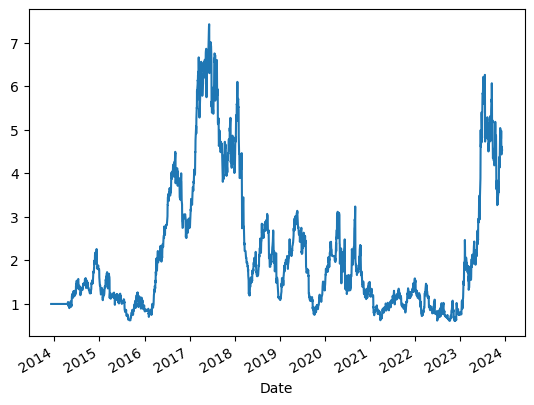

In [202]:
pnl = (potential_stocks * returns_open_to_close_df).sum(axis=1).add(1).cumprod()
pnl.plot()